# **HYPERPARAMETER TUNING**



*  Hyperparameters directly control model structure, function, and performance.



* Hyperparameter tuning allows data scientists to tweak model performance for optimal results


*   This process is an essential part of machine learning, and choosing appropriate hyperparameter values is crucial for success.


*  **What is an example of Hyperparameter optimization?**
           
An example of hyperparameter tuning is a grid search. In grid search, the data scientist or machine learning engineer defines a set of hyperparameter values to search over, and the algorithm tries all possible combinations of these values.


In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
data = pd.read_csv('/content/credit_card_default.csv')

In [184]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [186]:
data.shape

(30000, 25)



# **1.  Do the pre-processing on dataset**
  




In [187]:
                       # MISSING VALUE HANDLING

In [188]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [189]:
                       # OUTLIER DETECTION

In [190]:
#LIMIT_BAL

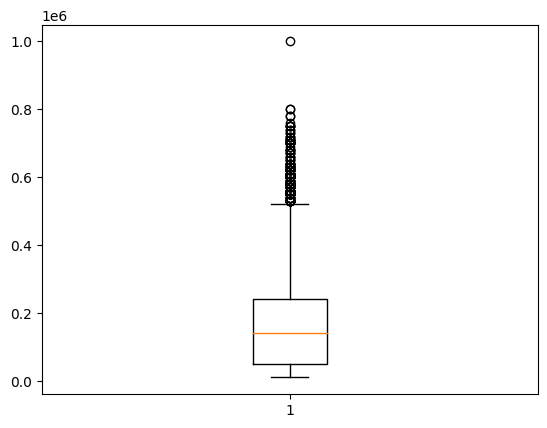

In [191]:
plt.boxplot(data['LIMIT_BAL'])
plt.show()

In [192]:
q1 = data['LIMIT_BAL'].quantile(0.25)
q2 = data['LIMIT_BAL'].quantile(0.5)
q3 = data['LIMIT_BAL'].quantile(0.75)

In [193]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

525000.0 -235000.0


In [194]:
data[(data['LIMIT_BAL']>up_lim) | (data['LIMIT_BAL']<low_lim)].index

Int64Index([   12,   433,   451,   527,   555,   737,   811,  1095,  1231,
             1347,
            ...
            28822, 28832, 29011, 29136, 29404, 29571, 29740, 29861, 29886,
            29963],
           dtype='int64', length=167)

In [195]:
data.drop([12,   433,   451,   527,   555,   737,   811,  1095,  1231,
             1347,
            28822, 28832, 29011, 29136, 29404, 29571, 29740, 29861, 29886,
            29963],inplace = True)

In [196]:
#EDUCATION

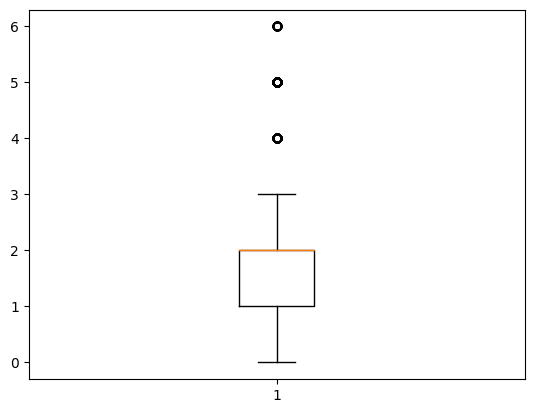

In [197]:
plt.boxplot(data['EDUCATION'])
plt.show()

In [198]:
q1 = data['EDUCATION'].quantile(0.25)
q2 = data['EDUCATION'].quantile(0.5)
q3 = data['EDUCATION'].quantile(0.75)

In [199]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

3.5 -0.5


In [200]:
data[(data['EDUCATION']>up_lim) | (data['EDUCATION']<low_lim)].index

Int64Index([   47,    69,   358,   385,   448,   502,   504,  1073,  1265,
             1282,
            ...
            29542, 29595, 29610, 29777, 29811, 29836, 29839, 29847, 29920,
            29966],
           dtype='int64', length=454)

In [201]:
data.drop([47,    69,   358,   385,   448,   502,   504,  1073,  1265,
             1282,
            29542, 29595, 29610, 29777, 29811, 29836, 29839, 29847, 29920,
            29966],inplace = True)

In [202]:
#AGE

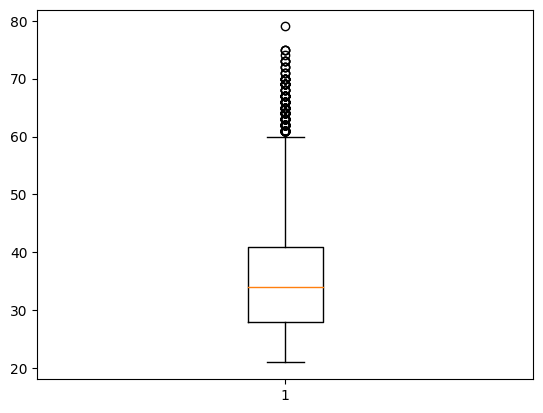

In [203]:
plt.boxplot(data['AGE'])
plt.show()

In [204]:
q1 = data['AGE'].quantile(0.25)
q2 = data['AGE'].quantile(0.5)
q3 = data['AGE'].quantile(0.75)

In [205]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

60.5 8.5


In [206]:
data[(data['AGE']>up_lim) | (data['AGE']<low_lim)].index

Int64Index([  102,   246,   366,   387,  1029,  1058,  1070,  1171,  1194,
             1505,
            ...
            29128, 29145, 29149, 29150, 29152, 29163, 29171, 29173, 29175,
            29179],
           dtype='int64', length=271)

In [207]:
data.drop([102,   246,   366,   387,  1029,  1058,  1070,  1171,  1194,
             1505,

            29128, 29145, 29149, 29150, 29152, 29163, 29171, 29173, 29175,
            29179],inplace = True)

In [208]:
#PAY_1

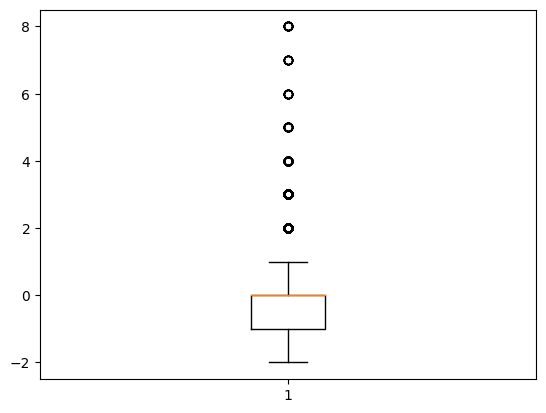

In [209]:
plt.boxplot(data['PAY_1'])
plt.show()

In [210]:
q1 = data['PAY_1'].quantile(0.25)
q2 = data['PAY_1'].quantile(0.5)
q3 = data['PAY_1'].quantile(0.75)

In [211]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

1.5 -2.5


In [212]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [213]:
data['PAY_1'] = data['PAY_1'].apply(limit_imputer)

In [214]:
#PAY_2

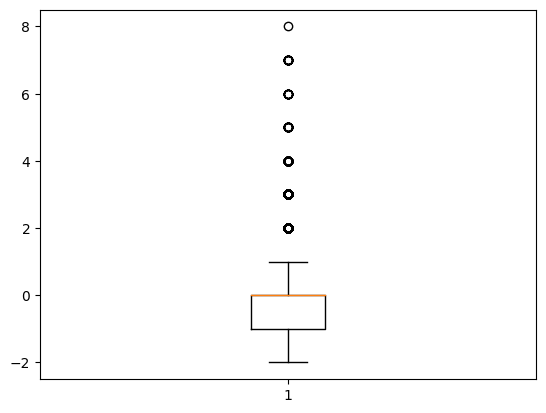

In [215]:
plt.boxplot(data['PAY_2'])
plt.show()

In [216]:
q1 = data['PAY_2'].quantile(0.25)
q2 = data['PAY_2'].quantile(0.5)
q3 = data['PAY_2'].quantile(0.75)

In [217]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

1.5 -2.5


In [218]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [219]:
data['PAY_2'] = data['PAY_2'].apply(limit_imputer)

In [220]:
#PAY_3

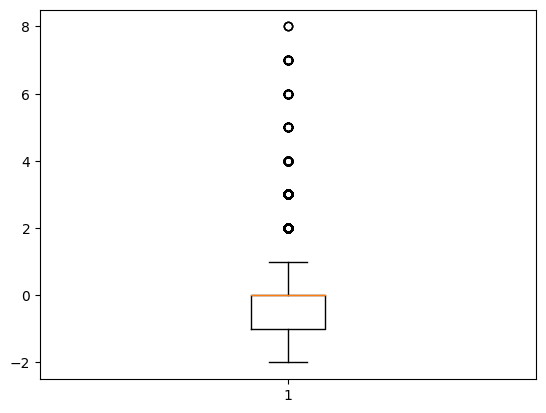

In [221]:
plt.boxplot(data['PAY_3'])
plt.show()

In [222]:
q1 = data['PAY_3'].quantile(0.25)
q2 = data['PAY_3'].quantile(0.5)
q3 = data['PAY_3'].quantile(0.75)

In [223]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

1.5 -2.5


In [224]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [225]:
data['PAY_3'] = data['PAY_3'].apply(limit_imputer)

In [226]:
#PAY_4

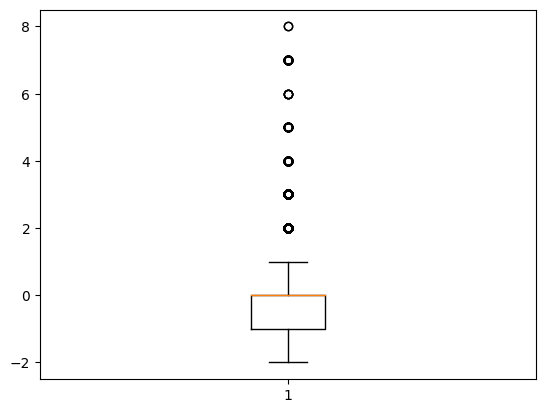

In [227]:
plt.boxplot(data['PAY_4'])
plt.show()

In [228]:
q1 = data['PAY_4'].quantile(0.25)
q2 = data['PAY_4'].quantile(0.5)
q3 = data['PAY_4'].quantile(0.75)

In [229]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

1.5 -2.5


In [230]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [231]:
data['PAY_4'] = data['PAY_4'].apply(limit_imputer)

In [232]:
#PAY_5

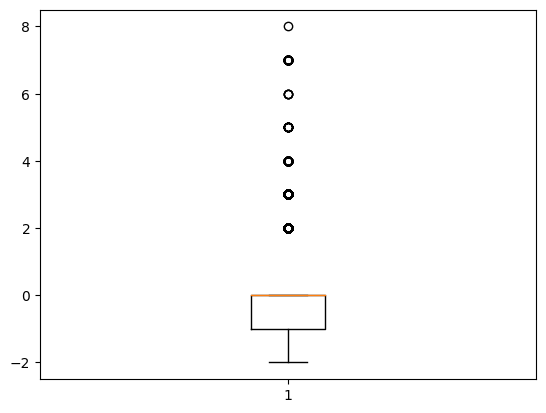

In [233]:
plt.boxplot(data['PAY_5'])
plt.show()

In [234]:
q1 = data['PAY_5'].quantile(0.25)
q2 = data['PAY_5'].quantile(0.5)
q3 = data['PAY_5'].quantile(0.75)

In [235]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

1.5 -2.5


In [236]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [237]:
data['PAY_5'] = data['PAY_5'].apply(limit_imputer)

In [238]:
#PAY_6

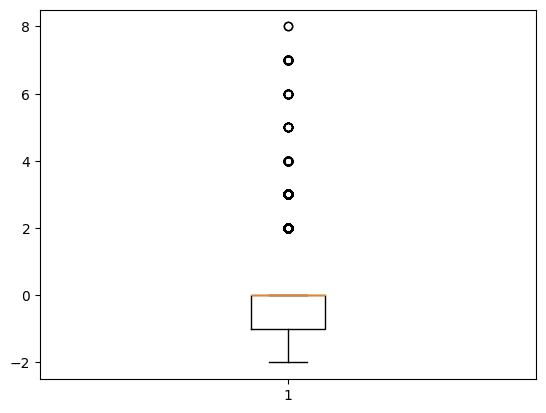

In [239]:
plt.boxplot(data['PAY_6'])
plt.show()

In [240]:
q1 = data['PAY_6'].quantile(0.25)
q2 = data['PAY_6'].quantile(0.5)
q3 = data['PAY_6'].quantile(0.75)

In [241]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

1.5 -2.5


In [242]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [243]:
data['PAY_6'] = data['PAY_6'].apply(limit_imputer)

In [244]:
#BILL_AMT1

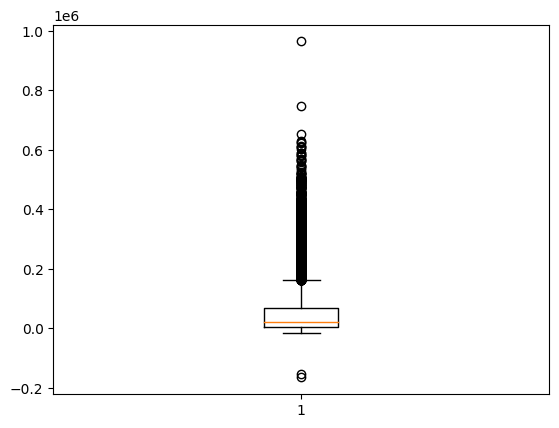

In [245]:
plt.boxplot(data['BILL_AMT1'])
plt.show()

In [246]:
q1 = data['BILL_AMT1'].quantile(0.25)
q2 = data['BILL_AMT1'].quantile(0.5)
q3 = data['BILL_AMT1'].quantile(0.75)

In [247]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

162116.875 -91582.125


In [248]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [249]:
data['BILL_AMT1'] = data['BILL_AMT1'].apply(limit_imputer)

In [250]:
#BILL_AMT2

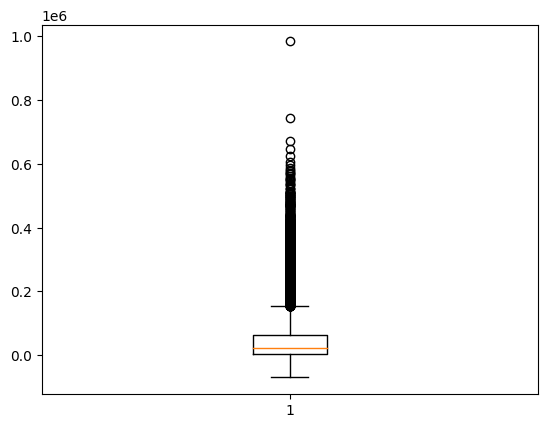

In [251]:
plt.boxplot(data['BILL_AMT2'])
plt.show()

In [252]:
q1 = data['BILL_AMT2'].quantile(0.25)
q2 = data['BILL_AMT2'].quantile(0.5)
q3 = data['BILL_AMT2'].quantile(0.75)

In [253]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

155051.875 -88271.125


In [254]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [255]:
data['BILL_AMT2'] = data['BILL_AMT2'].apply(limit_imputer)

In [256]:
#BILL_AMT3

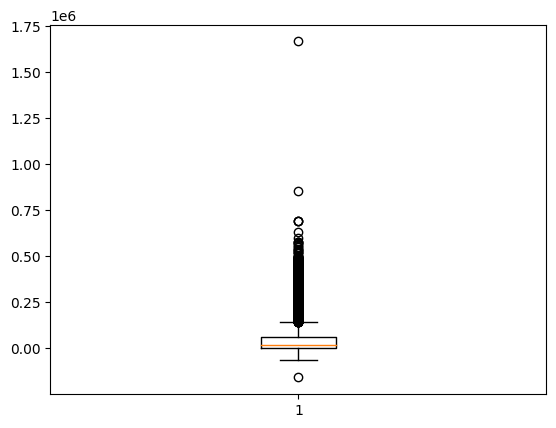

In [257]:
plt.boxplot(data['BILL_AMT3'])
plt.show()

In [258]:
q1 = data['BILL_AMT3'].quantile(0.25)
q2 = data['BILL_AMT3'].quantile(0.5)
q3 = data['BILL_AMT3'].quantile(0.75)

In [259]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

145933.375 -83301.625


In [260]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [261]:
data['BILL_AMT3'] = data['BILL_AMT3'].apply(limit_imputer)

In [262]:
#BILL_AMT4

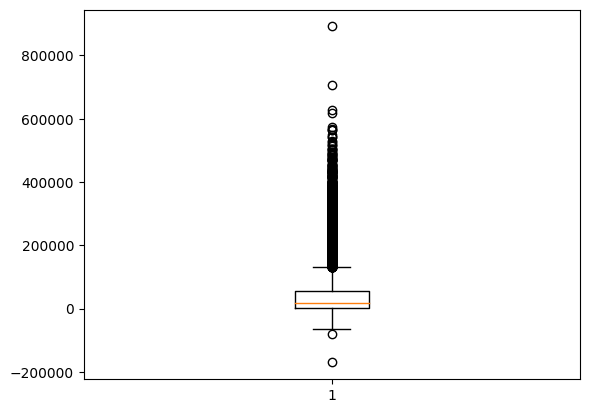

In [263]:
plt.boxplot(data['BILL_AMT4'])
plt.show()

In [264]:
q1 = data['BILL_AMT4'].quantile(0.25)
q2 = data['BILL_AMT4'].quantile(0.5)
q3 = data['BILL_AMT4'].quantile(0.75)

In [265]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

132455.875 -75763.125


In [266]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [267]:
data['BILL_AMT4'] = data['BILL_AMT4'].apply(limit_imputer)

In [268]:
#BILL_AMT5

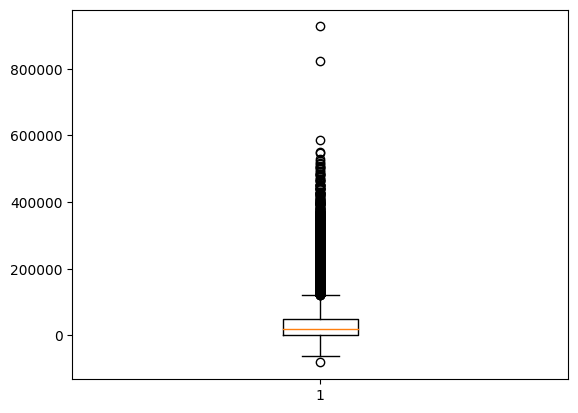

In [269]:
plt.boxplot(data['BILL_AMT5'])
plt.show()

In [270]:
q1 = data['BILL_AMT5'].quantile(0.25)
q2 = data['BILL_AMT5'].quantile(0.5)
q3 = data['BILL_AMT5'].quantile(0.75)

In [271]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

122607.875 -70749.125


In [272]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [273]:
data['BILL_AMT5'] = data['BILL_AMT5'].apply(limit_imputer)

In [274]:
#BILL_AMT6

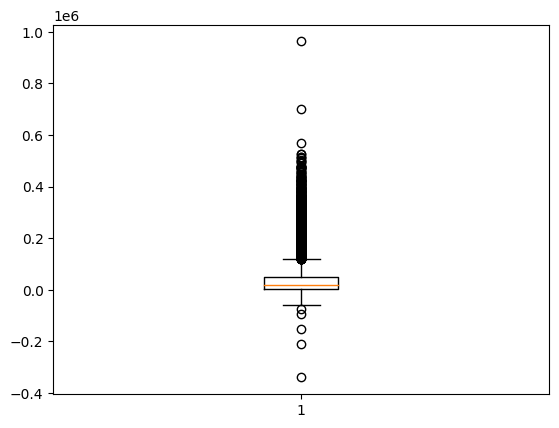

In [275]:
plt.boxplot(data['BILL_AMT6'])
plt.show()

In [276]:
q1 = data['BILL_AMT6'].quantile(0.25)
q2 = data['BILL_AMT6'].quantile(0.5)
q3 = data['BILL_AMT6'].quantile(0.75)

In [277]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

120878.75 -70519.25


In [278]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [279]:
data['BILL_AMT6'] = data['BILL_AMT6'].apply(limit_imputer)

In [280]:
##PAY_AMT1

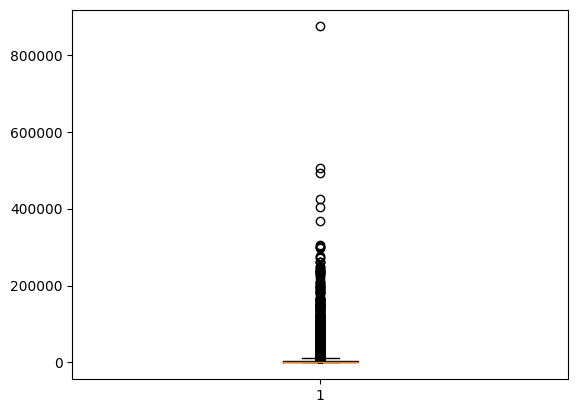

In [281]:
plt.boxplot(data['PAY_AMT1'])
plt.show()

In [282]:
q1 = data['PAY_AMT1'].quantile(0.25)
q2 = data['PAY_AMT1'].quantile(0.5)
q3 = data['PAY_AMT1'].quantile(0.75)

In [283]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

11015.0 -5009.0


In [284]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [285]:
data['PAY_AMT1'] = data['PAY_AMT1'].apply(limit_imputer)

In [286]:
#PAY_AMT2

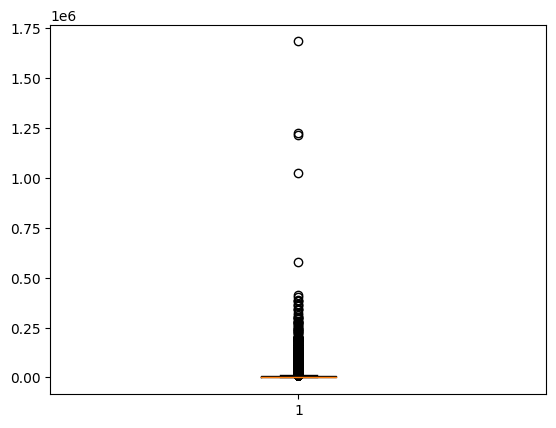

In [287]:
plt.boxplot(data['PAY_AMT2'])
plt.show()

In [288]:
q1 = data['PAY_AMT2'].quantile(0.25)
q2 = data['PAY_AMT2'].quantile(0.5)
q3 = data['PAY_AMT2'].quantile(0.75)

In [289]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

11252.0 -5420.0


In [290]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [291]:
data['PAY_AMT2'] = data['PAY_AMT2'].apply(limit_imputer)

In [292]:
#PAY_AMT3

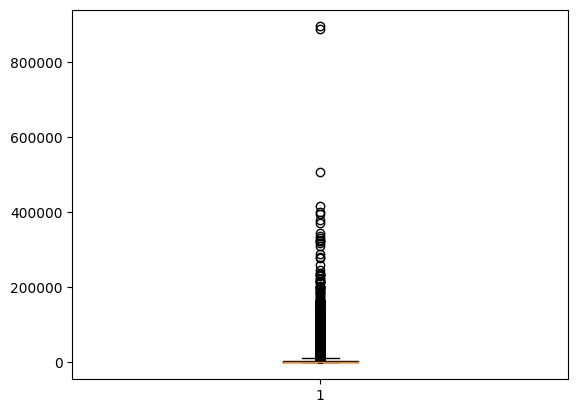

In [293]:
plt.boxplot(data['PAY_AMT3'])
plt.show()

In [294]:
q1 = data['PAY_AMT3'].quantile(0.25)
q2 = data['PAY_AMT3'].quantile(0.5)
q3 = data['PAY_AMT3'].quantile(0.75)

In [295]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

10665.0 -5775.0


In [296]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [297]:
data['PAY_AMT3'] = data['PAY_AMT3'].apply(limit_imputer)

In [298]:
#PAY_AMT4

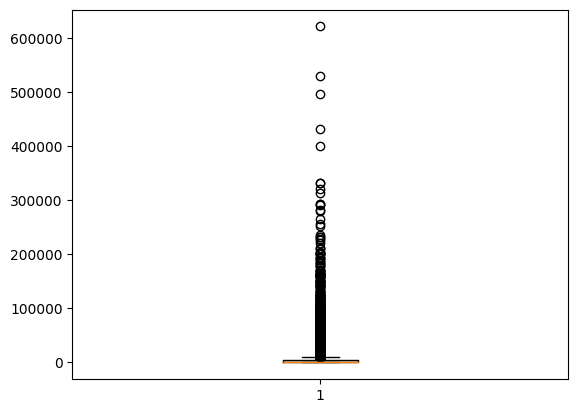

In [299]:
plt.boxplot(data['PAY_AMT4'])
plt.show()

In [300]:
q1 = data['PAY_AMT4'].quantile(0.25)
q2 = data['PAY_AMT4'].quantile(0.5)
q3 = data['PAY_AMT4'].quantile(0.75)

In [301]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

9579.375 -5277.625


In [302]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [303]:
data['PAY_AMT4'] = data['PAY_AMT4'].apply(limit_imputer)

In [304]:
#PAY_AMT5

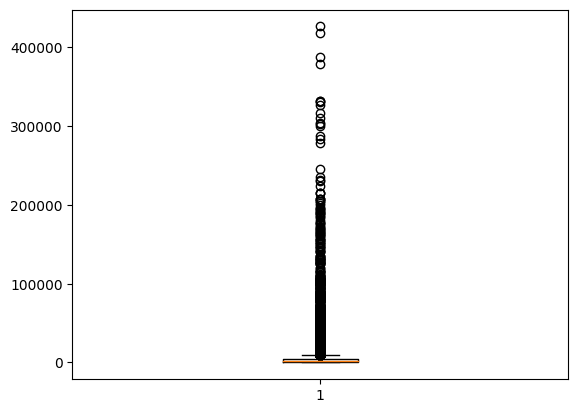

In [305]:
plt.boxplot(data['PAY_AMT5'])
plt.show()

In [306]:
q1 = data['PAY_AMT5'].quantile(0.25)
q2 = data['PAY_AMT5'].quantile(0.5)
q3 = data['PAY_AMT5'].quantile(0.75)

In [307]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

9684.125 -5408.875


In [308]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [309]:
data['PAY_AMT5'] = data['PAY_AMT5'].apply(limit_imputer)

In [310]:
#PAY_AMT6

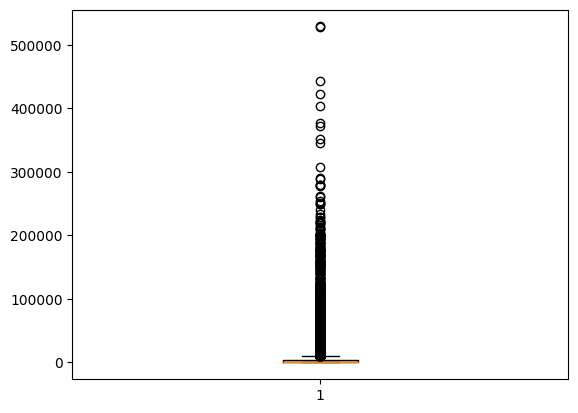

In [311]:
plt.boxplot(data['PAY_AMT6'])
plt.show()

In [312]:
q1 = data['PAY_AMT6'].quantile(0.25)
q2 = data['PAY_AMT6'].quantile(0.5)
q3 = data['PAY_AMT6'].quantile(0.75)

In [313]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

9826.0 -5710.0


In [314]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [315]:
data['PAY_AMT6'] = data['PAY_AMT6'].apply(limit_imputer)

In [316]:
#default payment next month

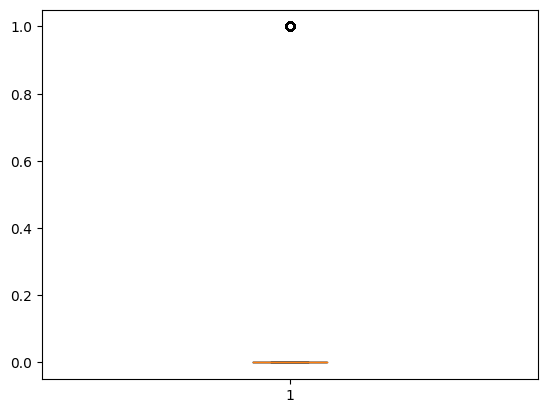

In [317]:
plt.boxplot(data['default payment next month'])
plt.show()

In [318]:
q1 = data['default payment next month'].quantile(0.25)
q2 = data['default payment next month'].quantile(0.5)
q3 = data['default payment next month'].quantile(0.75)

In [319]:
iqr = q3 -q1
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

0.0 0.0


In [320]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

In [321]:
data['default payment next month'] = data['default payment next month'].apply(limit_imputer)

In [322]:
data.shape

(29940, 25)

In [323]:
                            #ENCODING

In [324]:
data.drop('ID',axis=1,inplace=True)

In [325]:
y=data['default payment next month']
x=[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [326]:
x = pd.get_dummies(data)

In [327]:
from sklearn.preprocessing import LabelEncoder

In [328]:
le = LabelEncoder()

In [329]:
y = le.fit_transform(y)

In [181]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

In [330]:
                       #KNN (K-Nearest Neighbors Algorithm)

In [331]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [332]:
metric_k=[]
n = np.arange(3,15)

for k in n:
  classifier = KNeighborsClassifier(n_neighbors = k,metric ='euclidean')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [333]:
metric_k

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

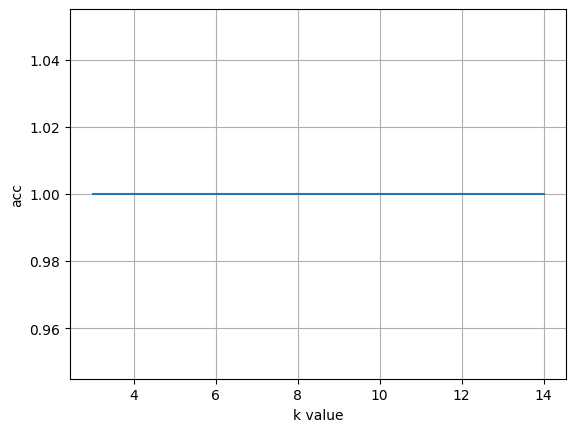

In [334]:
plt.plot(n,metric_k,)
plt.xlabel('k value')
plt.ylabel('acc')
plt.grid()
plt.show()

In [335]:
classifier = KNeighborsClassifier(n_neighbors = 14,metric ='euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [336]:
accuracy_score(y_test,y_pred)

1.0

In [337]:
confusion_matrix(y_test,y_pred)

array([[5988]])

In [338]:
precision_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [339]:
recall_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [340]:
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.0

In [341]:
           # AdaBoost

In [342]:
from sklearn.ensemble import AdaBoostClassifier
ad_clf = AdaBoostClassifier(n_estimators=7)

In [343]:
ad_clf = ad_clf.fit(x_train,y_train)

In [344]:
y_pred=ad_clf.predict(x_test)

In [345]:
accuracy_score(y_test,y_pred)

1.0

In [346]:
confusion_matrix(y_test,y_pred)

array([[5988]])

In [347]:
precision_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [348]:
recall_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [349]:
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.0

In [350]:
    #import xgboost as xgb

In [351]:
import xgboost as xgb

In [352]:
xgb_clf=xgb.XGBClassifier()

In [353]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [354]:
y_pred_xgb = xgb_clf.predict(x_test)

In [355]:
accuracy_score(y_test,y_pred_xgb)

1.0

# **perform hyperparameter tuning**

In [356]:
from sklearn.linear_model import LogisticRegression

In [357]:
from sklearn.model_selection import cross_val_score, KFold
model = LogisticRegression()
kf = KFold(n_splits = 10)

In [358]:
from sklearn import tree
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
  score = cross_val_score(tree.DecisionTreeClassifier(max_depth = val),x,y,cv = kf, scoring='accuracy')
  print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 1.000
Average score(2): 1.000
Average score(3): 1.000
Average score(4): 1.000
Average score(5): 1.000
Average score(6): 1.000
Average score(7): 1.000
Average score(8): 1.000
Average score(9): 1.000
Average score(10): 1.000


In [359]:
for train_index, test_index in kf.split(x,y):
  print('Training index:', train_index)
  print('Test index:', test_index)

Training index: [ 2994  2995  2996 ... 29937 29938 29939]
Test index: [   0    1    2 ... 2991 2992 2993]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [2994 2995 2996 ... 5985 5986 5987]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [5988 5989 5990 ... 8979 8980 8981]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [ 8982  8983  8984 ... 11973 11974 11975]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [11976 11977 11978 ... 14967 14968 14969]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [14970 14971 14972 ... 17961 17962 17963]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [17964 17965 17966 ... 20955 20956 20957]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [20958 20959 20960 ... 23949 23950 23951]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [23952 23953 23954 ... 26943 26944 26945]
Training i

In [ ]:
# to get the score
score = cross_val_score(model, x,y, cv = kf)
print('Cross validation scores are {}'.format(score))

In [ ]:
print('average cross validation score: {}'.format(score.mean()))

In [361]:
# applying stratified
from sklearn.model_selection import StratifiedKFold

In [362]:
skfold_validator = StratifiedKFold(n_splits = 10)

In [364]:
for train_index, test_index in skfold_validator.split(x,y):
  print('Training index:', train_index)
  print('Test index:', test_index)

Training index: [ 2994  2995  2996 ... 29937 29938 29939]
Test index: [   0    1    2 ... 2991 2992 2993]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [2994 2995 2996 ... 5985 5986 5987]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [5988 5989 5990 ... 8979 8980 8981]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [ 8982  8983  8984 ... 11973 11974 11975]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [11976 11977 11978 ... 14967 14968 14969]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [14970 14971 14972 ... 17961 17962 17963]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [17964 17965 17966 ... 20955 20956 20957]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [20958 20959 20960 ... 23949 23950 23951]
Training index: [    0     1     2 ... 29937 29938 29939]
Test index: [23952 23953 23954 ... 26943 26944 26945]
Training i

In [ ]:
skcv_result = cross_val_score(model, X, y,cv = skfold_validator)
skcv_result

In [ ]:
print('Average cross validation score: {}'.format(skcv_result.mean()))

In [ ]:
from sklearn import tree
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
  score = cross_val_score(tree.DecisionTreeClassifier(max_depth = val),x,y,cv = kf, scoring='accuracy')
  print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

In [ ]:
parameters = {'max_depth':[10,20,30,40,50,60,70,80,90,100],
              'criterion':['gini','entropy'],
              'n_estimators':[50,100,200,400,600]}

In [366]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(),
                           parameters,
                           cv = 5,
                           scoring='accuracy',n_jobs = -1)

In [ ]:
grid_result=grid_search.fit(x_train,y_train)

In [ ]:
print('Best Paameters:', grid_result.best_params_)
print('Best Score:', grid_result.best_score_)

In [ ]:
# randomized Search

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = RandomForestClassifier(),param_distributions = parameters,
                                   verbose = 1, n_jobs = -1,
                                   n_iter=50)

random_result = random_search.fit(x_train, y_train)

In [ ]:
print('Best Paameters:', random_result.best_params_)
print('Best Score:', random_result.best_score_)